## 3. Implementando os Simuladores para o Caso Exponencial

Cenário $\lambda = 1$ e $\mu  = 2$

Descrição: Considere uma fila M/M/1, em que chegadas ocorrem segundo um fluxo Poisson com taxa 1 chegadas/segundo e serviços são tais que cada serviço é distribuído exponencialmente com média 1/2 segundo. Implemente dois simuladores.

In [1]:
%matplotlib ipympl

In [7]:
import random
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [8]:
def simulate1(arrival_rate, service_rate, max_steps=1000, determ_arrival=False, determ_service=False):
    total_arrivals = total_departures = total_waiting_time = simulation_time = queue_length = 0
    arrivals_queue = []

    gen_arrival = (lambda rate:1/rate) if determ_arrival else lambda rate:random.expovariate(rate)
    gen_service = (lambda rate:1/rate) if determ_service else lambda rate:random.expovariate(rate)

    for i in range(max_steps):
        sample_arrival = gen_arrival(arrival_rate)
        sample_departure = gen_service(service_rate)

        if queue_length == 0 or sample_arrival < sample_departure:
            # Arrival
            simulation_time += sample_arrival
            total_arrivals += 1
            queue_length += 1
            if queue_length > 1:
                arrivals_queue.append(simulation_time)
        else:
            # Departure
            simulation_time += sample_departure
            total_departures += 1
            queue_length -= 1
            if len(arrivals_queue) > 0:
                total_waiting_time += simulation_time - arrivals_queue.pop(0)

    average_waiting_time = total_waiting_time / total_departures
    average_clients_in_system = total_arrivals / simulation_time

    return {
        "average_waiting_time": average_waiting_time,
        "average_clients_in_system": average_clients_in_system
    }

In [9]:
simulate1(1, 2, 1000)

{'average_waiting_time': 0.5323505062479723,
 'average_clients_in_system': 0.9944119940766967}

In [35]:
def get_confidence_interval(avg_waiting_time):
    n = len(avg_waiting_time)
    mean = np.sum(avg_waiting_time)/n
    s = np.std(avg_waiting_time)
    min = mean - 1.96*s/math.sqrt(n)
    max = mean + 1.96*s/math.sqrt(n)
    return [min,max]

Intervalo de Confiança (max_steps: 100): [0.44271300228983795, 0.48851920659388043]
Intervalo de Confiança (max_steps: 1000): [0.4920315901026165, 0.507511804531374]
Intervalo de Confiança (max_steps: 10000): [0.49570545002091615, 0.5001491569806776]


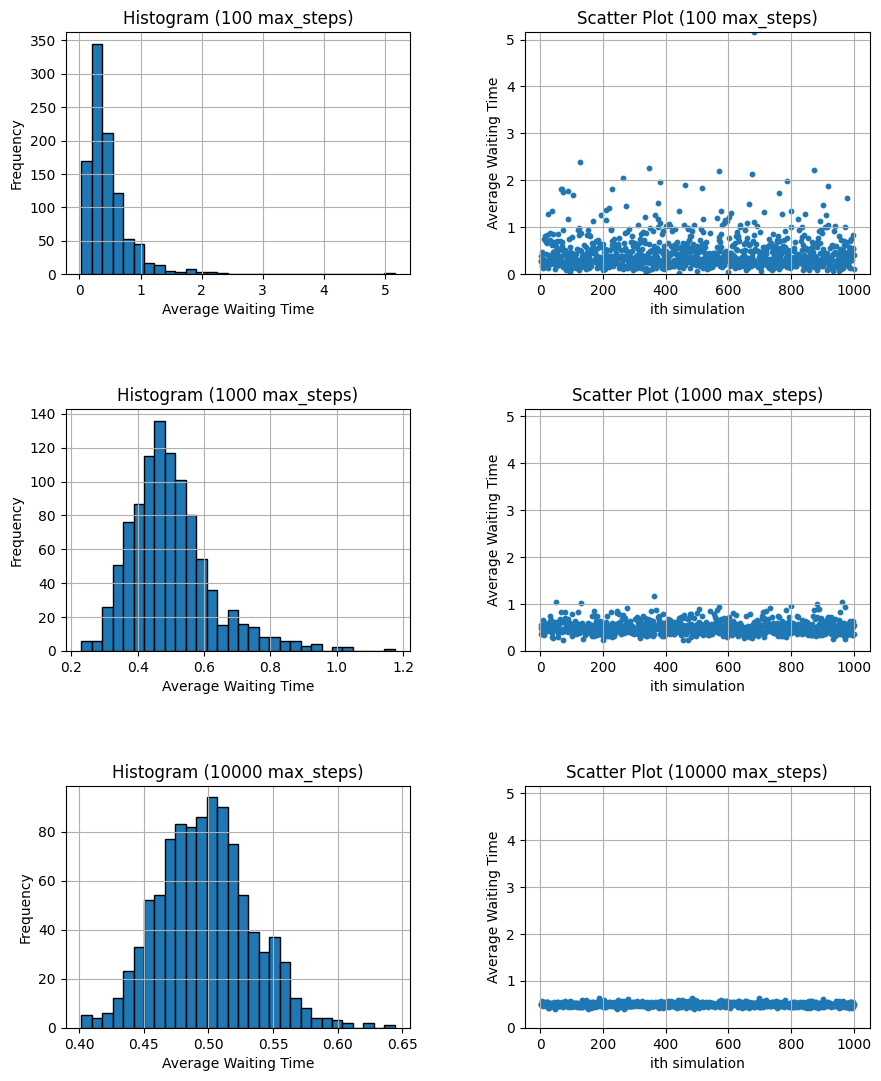

In [45]:
arrival_rate = 1 # lambda
service_rate = 2 # mu
n_simulations = 1000
max_steps = [100, 1000, 10000]

fig, axes = plt.subplots(3, 2, figsize=(10, 12))

for i in range(len(max_steps)):
  average_waiting_times = [simulate1(arrival_rate, service_rate, max_steps[i])["average_waiting_time"] for _ in range(n_simulations)]
  confidence_min, confidence_max = get_confidence_interval(average_waiting_times)
  print(f"Intervalo de Confiança (max_steps: {max_steps[i]}): [{confidence_min}, {confidence_max}]")

  if i == 0:
    ylim = max(average_waiting_times)

  # Histogram
  axes[i][0].hist(average_waiting_times, bins=30, edgecolor='black')
  axes[i][0].set_xlabel('Average Waiting Time')
  axes[i][0].set_ylabel('Frequency')
  axes[i][0].set_title(f'Histogram ({max_steps[i]} max_steps)')

  # Scatter Plot
  axes[i][1].scatter(range(1, n_simulations + 1), average_waiting_times, s=10)
  axes[i][1].set_xlabel('ith simulation')
  axes[i][1].set_ylabel('Average Waiting Time')
  axes[i][1].set_ylim(0, ylim)
  axes[i][1].set_title(f'Scatter Plot ({max_steps[i]} max_steps)')

  axes[i][0].grid(True)
  axes[i][1].grid(True)


fig.tight_layout(pad=5.0)
plt.show()

In [17]:
get_confidence_interval(average_waiting_times)

[0.48729592029125396, 0.5019053356341272]